Epoch 1/50
6231/6231 [==============================] - 18s 3ms/step - loss: 0.7614 - val_loss: 0.6613
Epoch 2/50
6231/6231 [==============================] - 16s 3ms/step - loss: 0.6688 - val_loss: 0.6445
Epoch 3/50
6231/6231 [==============================] - 18s 3ms/step - loss: 0.6578 - val_loss: 0.6370
Epoch 4/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.6527 - val_loss: 0.6327
Epoch 5/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.6496 - val_loss: 0.6311
Epoch 6/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.6487 - val_loss: 0.6301
Epoch 7/50
6231/6231 [==============================] - 17s 3ms/step - loss: 0.6476 - val_loss: 0.6294
Epoch 8/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.6468 - val_loss: 0.6286
Epoch 9/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.6460 - val_loss: 0.6288
Epoch 10/50
6231/6231 [==============================] - 17s 3ms/step - l

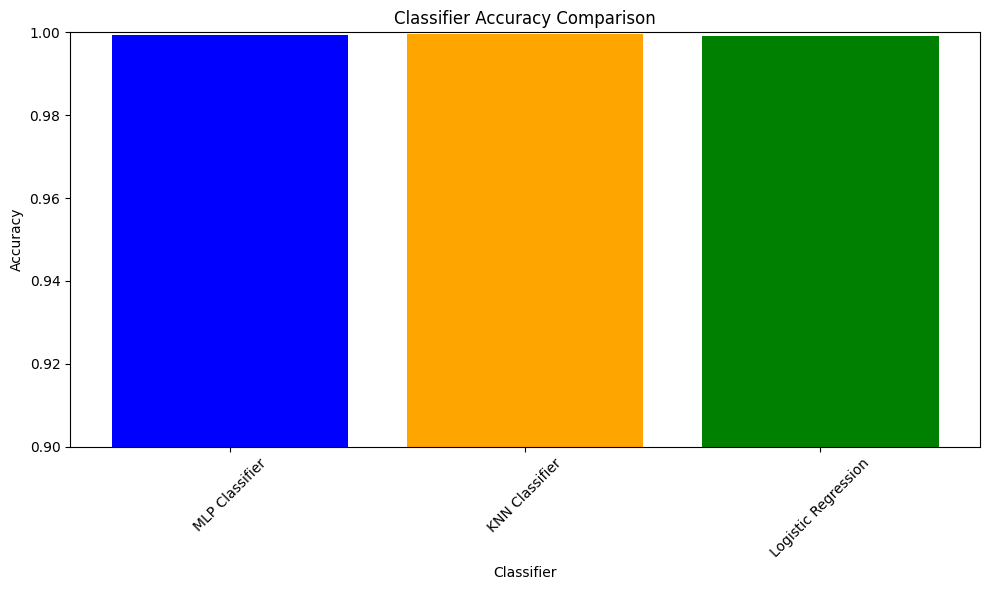

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
from keras.layers import Input, Dense
from keras.models import Model

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

# Separate features (X) and labels (y)
X = df.drop('Class', axis=1).values  # Features
y = df['Class'].values  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = 15  # Choosing the dimension of the hidden layer
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='relu')(encoder_layer)

autoencoder = Model(inputs=input_layer, outputs=decoder_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

# Extract features using the trained autoencoder
encoder = Model(inputs=input_layer, outputs=encoder_layer)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Define classifiers
classifiers = {
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train_encoded, y_train)
    y_pred = clf.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1, cm])

# Display results in tables
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
print(tabulate(results, headers=headers))

# Plot classifiers' accuracy
classifiers_names = [result[0] for result in results]
accuracy_scores = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

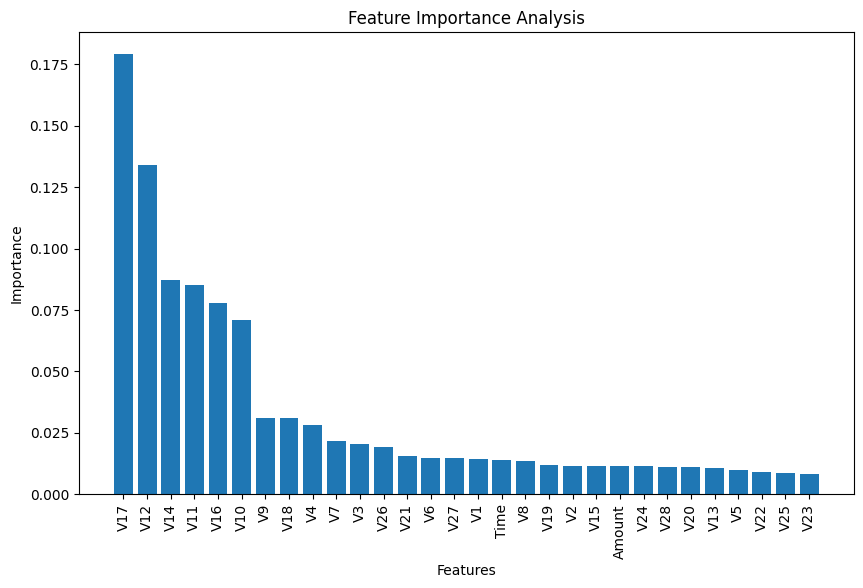

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Initialize and fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.show()


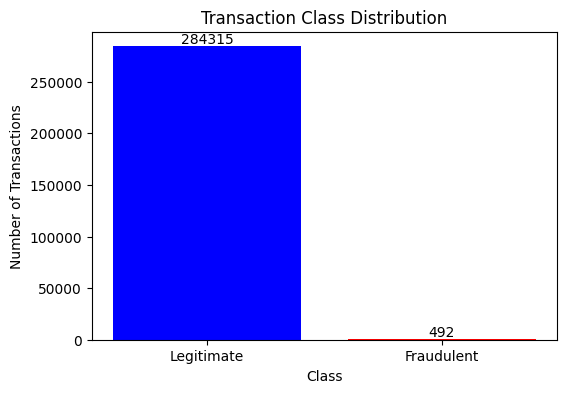

In [ ]:
# Plot transaction class distribution
class_distribution = df['Class'].value_counts()
class_names = ['Legitimate', 'Fraudulent']

plt.figure(figsize=(6, 4))
bars = plt.bar(class_names, class_distribution, color=['blue', 'red'])

# Add text annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Transaction Class Distribution')
plt.show()


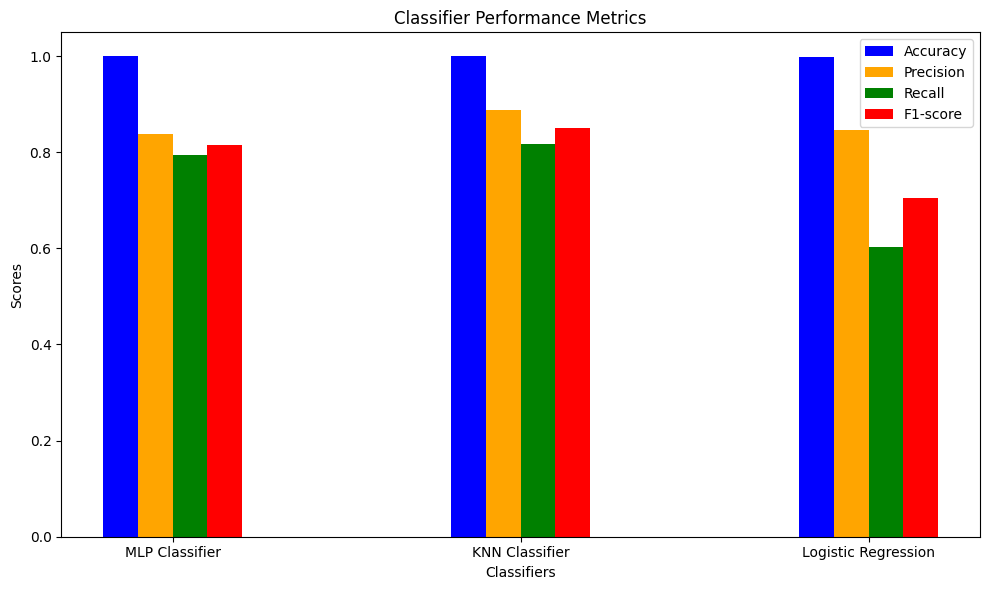

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier names
classifiers_names = ["MLP Classifier", "KNN Classifier", "Logistic Regression"]

# Metrics scores for each classifier
accuracy_scores = [0.999427, 0.999544, 0.999192]
precision_scores = [0.837209, 0.888, 0.845361]
recall_scores = [0.794118, 0.816176, 0.602941]
f1_scores = [0.815094, 0.850575, 0.703863]

# Bar positions
bar_width = 0.1  # Reduce the width for better visualization
index = np.arange(len(classifiers_names))

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy
plt.bar(index - 1.5*bar_width, accuracy_scores, bar_width, label='Accuracy', color='blue')

# Precision
plt.bar(index - 0.5*bar_width, precision_scores, bar_width, label='Precision', color='orange')

# Recall
plt.bar(index + 0.5*bar_width, recall_scores, bar_width, label='Recall', color='green')

# F1-score
plt.bar(index + 1.5*bar_width, f1_scores, bar_width, label='F1-score', color='red')

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classifier Performance Metrics')
plt.xticks(index, classifiers_names)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
